# **Pothole Detection**
- **[Models - YoloV8](https://docs.ultralytics.com/es/models/yolov8/#supported-tasks-and-modes)**
- **[YoloV8 Reporsitory](https://github.com/ultralytics/ultralytics)**
- **[Guide](https://docs.ultralytics.com/es/guides/#guides)**
- **[Performance-Metrics](https://docs.ultralytics.com/es/guides/yolo-performance-metrics/#object-detection-metrics)**

# **Train YoloV8**

In [12]:
# Download YOLOv8s-cls to be trained
from ultralytics import YOLO 
model = YOLO("yolov8s.pt")

In [ ]:
# Download the dataset
from roboflow import Roboflow
rf = Roboflow(api_key="J829BSese6NgVXXuT2u7")
project = rf.workspace("work-vc34v").project("pothole-ia66c")
dataset = project.version(3).download("yolov8")

In [16]:
# Train the model with the selected dataset with the paths in the yaml document
model.train(data = ".\data.yaml", epochs = 3, conf = 0.10 , batch=2)

New https://pypi.org/project/ultralytics/8.1.34 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.11.8 torch-2.1.2+cpu CPU (Intel Core(TM) i5-4300U 1.90GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=.\data.yaml, epochs=3, patience=50, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.1, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=Fal

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001BDB91568D0>
fitness: 0.037820273788768316
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([   0.034392])
names: {0: 'Pothole'}
plot: True
results_dict: {'metrics/precision(B)': 0.06861960995686098, 'metrics/recall(B)': 0.375, 'metrics/mAP50(B)': 0.06867497716894977, 'metrics/mAP50-95(B)': 0.0343919734131926, 'fitness': 0.037820273788768316}
save_dir: WindowsPath('C:/Users/user/runs/detect/train6')
speed: {'preprocess': 7.874190807342529, 'inference': 785.6250107288361, 'loss': 0.0, 'postprocess': 0.8745193481445312}

# **Analyse the model**

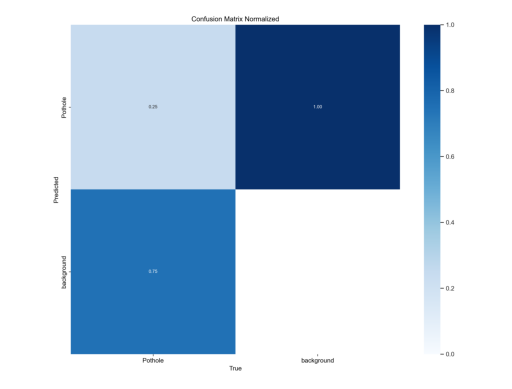

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# Confusion Matrix Normalized
image_path = r"C:\Users\user\runs\detect\train3\confusion_matrix_normalized.png"

imagen = Image.open(image_path)

plt.imshow(imagen)
plt.axis('off')  
plt.show()

In [14]:
# Load a custom model with the best weights 
best_model = YOLO(r'C:\Users\user\runs\detect\train3\weights\best.pt')  
# or you can use the pre-trained model
model

# Validate the model
metrics = best_model.val() 
metrics.box.map    
metrics.box.map50  
metrics.box.map75  
metrics.box.maps 

Ultralytics YOLOv8.0.196  Python-3.11.8 torch-2.1.2+cpu CPU (Intel Core(TM) i5-4300U 1.90GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning C:\Users\user\Desktop\Git-Repositories\Pothole_Detection\Pothole-3\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.93s/it]
                   all          8          8      0.173       0.25     0.0692     0.0224
Speed: 6.4ms preprocess, 822.9ms inference, 0.0ms loss, 16.7ms postprocess per image
Results saved to C:\Users\user\runs\detect\val2


array([   0.022438])

# **Run the model**

In [15]:
# Infererence model with the best weights
# Image
best_model.predict(r'C:\Users\user\Desktop\Git-Repositories\Pothole_Detection\Pothole-3\valid\images\300px-Newport_Whitepit_Lane_pot_hole-JPG_jpg.rf.0e55c4e267f905d23628d27eb23fb629.jpg', save = True, save_txt = True)
# Video
# best_model("/content/video.mp4" , save=True)


image 1/1 C:\Users\user\Desktop\Git-Repositories\Pothole_Detection\Pothole-3\valid\images\300px-Newport_Whitepit_Lane_pot_hole-JPG_jpg.rf.0e55c4e267f905d23628d27eb23fb629.jpg: 640x640 1 Pothole, 1552.0ms
Speed: 32.0ms preprocess, 1552.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\user\runs\detect\predict
1 label saved to C:\Users\user\runs\detect\predict\labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Pothole'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 